In [2]:
# 1. Chargement et inspection des données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Bibliothèques importées avec succès ✅")

Bibliothèques importées avec succès ✅


In [8]:
# Charger le jeu de données California Housing
housing = fetch_california_housing(as_frame=True)
df = housing.frame
print(f"Dimensions du dataset : {df.shape[0]} lignes × {df.shape[1]} colonnes")
print(f"\nVariable cible : MedHouseVal (valeur médiane du logement en centaines de milliers de $)")
print(f"\nDescription des variables :")
print("-" * 60)
descriptions = {
'MedInc': 'Revenu médian du quartier',
'HouseAge': 'Âge médian des logements',
'AveRooms': 'Nombre moyen de pièces par logement',
'AveBedrms': 'Nombre moyen de chambres par logement',
'Population': 'Population du quartier',
'AveOccup': 'Nombre moyen d\'occupants par logement',
'Latitude': 'Latitude géographique',
'Longitude': 'Longitude géographique',
'MedHouseVal': 'Prix médian du logement (cible)'
}
for col, desc in descriptions.items():
    print(f"  {col:15s} → {desc}")

Dimensions du dataset : 20640 lignes × 9 colonnes

Variable cible : MedHouseVal (valeur médiane du logement en centaines de milliers de $)

Description des variables :
------------------------------------------------------------
  MedInc          → Revenu médian du quartier
  HouseAge        → Âge médian des logements
  AveRooms        → Nombre moyen de pièces par logement
  AveBedrms       → Nombre moyen de chambres par logement
  Population      → Population du quartier
  AveOccup        → Nombre moyen d'occupants par logement
  Latitude        → Latitude géographique
  Longitude       → Longitude géographique
  MedHouseVal     → Prix médian du logement (cible)


In [9]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
# 2. Nettoyage des données
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [10]:
print("Nombre de doublons :", df.duplicated().sum())
df = df.drop_duplicates()

Nombre de doublons : 0


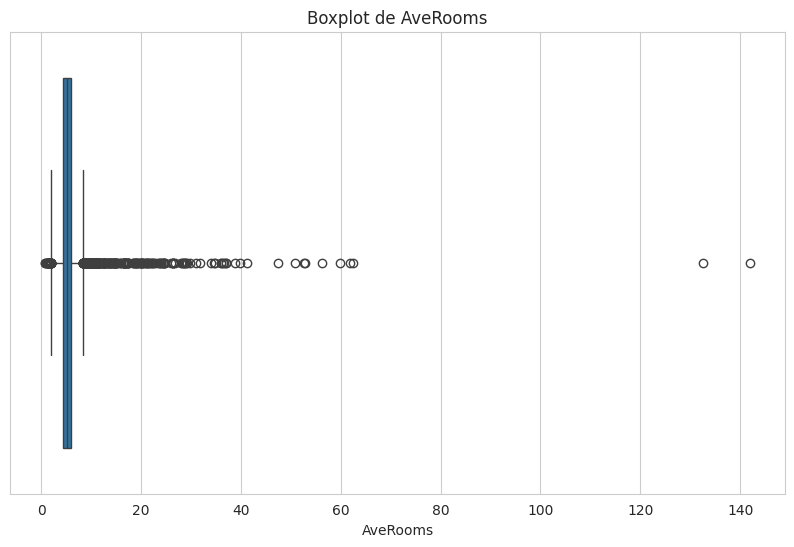

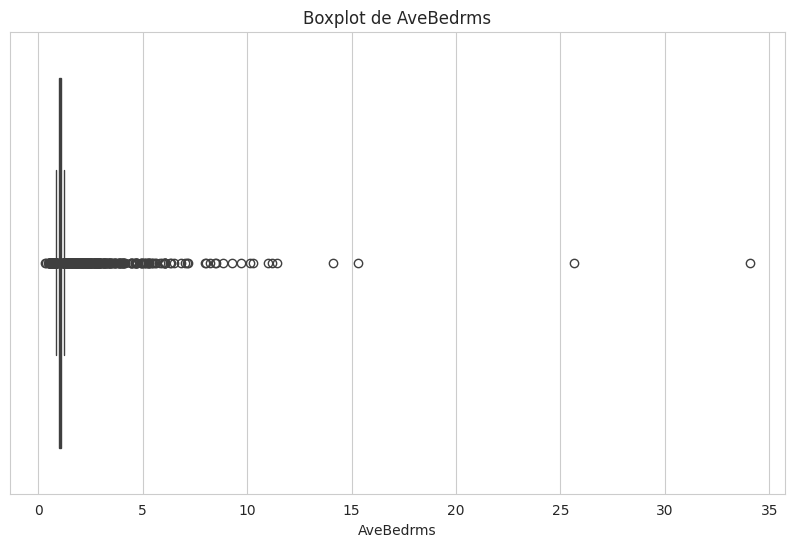

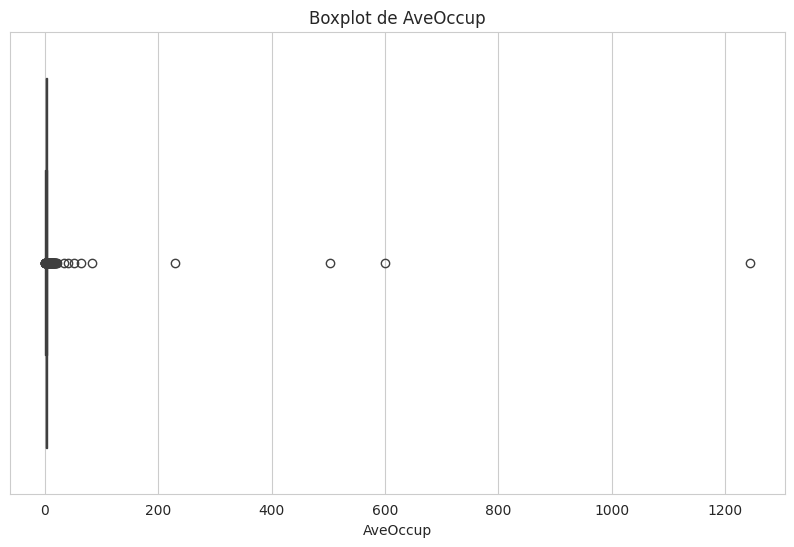

In [11]:
cols_outliers = ['AveRooms', 'AveBedrms', 'AveOccup']

for col in cols_outliers:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

In [13]:
df = df[(df['AveRooms'] < 50) &
        (df['AveBedrms'] < 10) &
        (df['AveOccup'] < 20)]

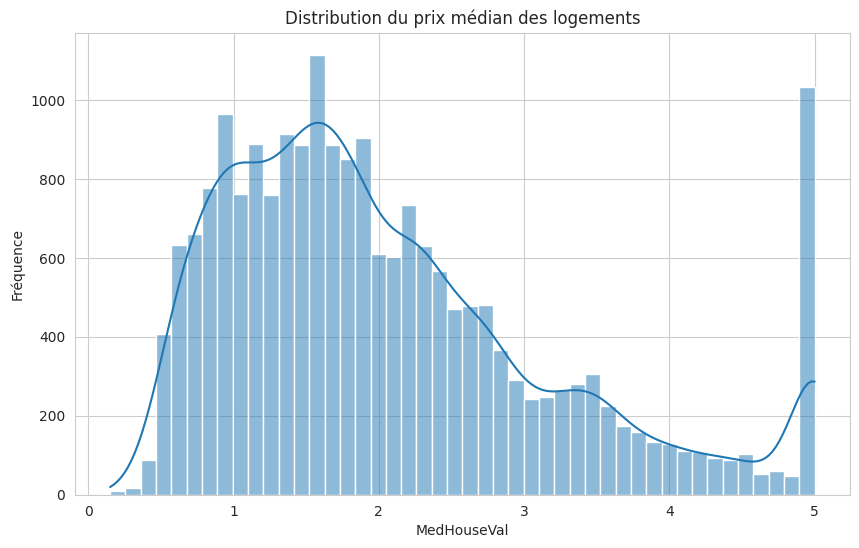

In [14]:
# 3. Analyse exploratoire (EDA)
plt.figure()
sns.histplot(df['MedHouseVal'], kde=True)
plt.title("Distribution du prix médian des logements")
plt.xlabel("MedHouseVal")
plt.ylabel("Fréquence")
plt.show()

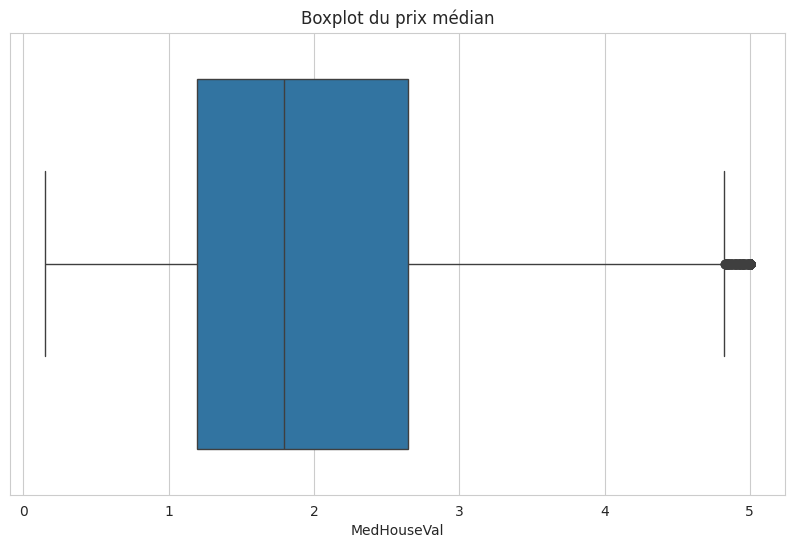

In [15]:
plt.figure()
sns.boxplot(x=df['MedHouseVal'])
plt.title("Boxplot du prix médian")
plt.show()

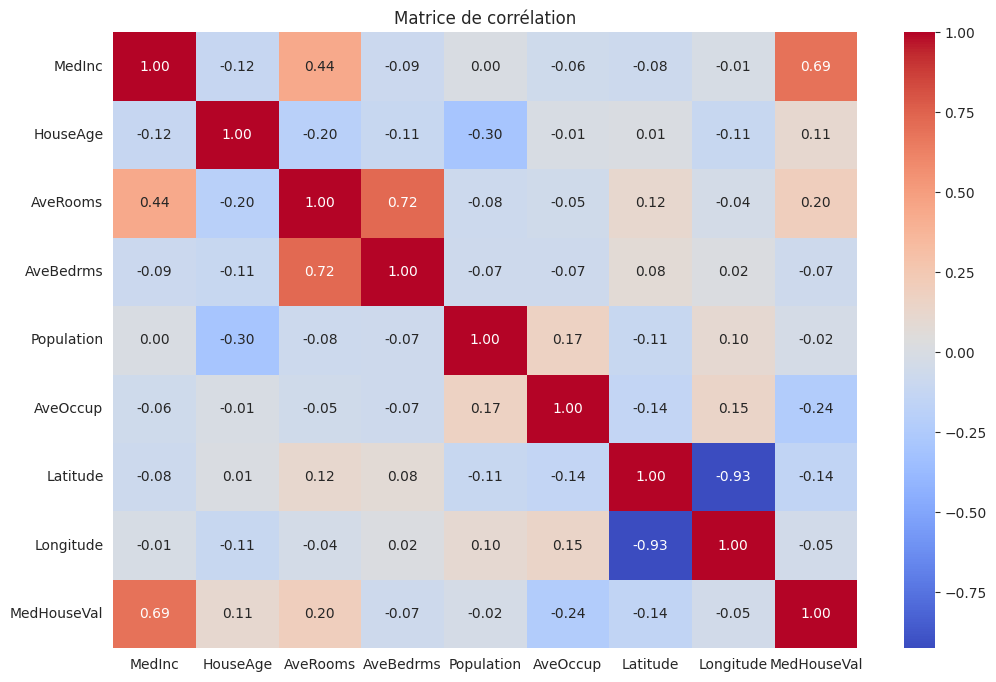

In [16]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

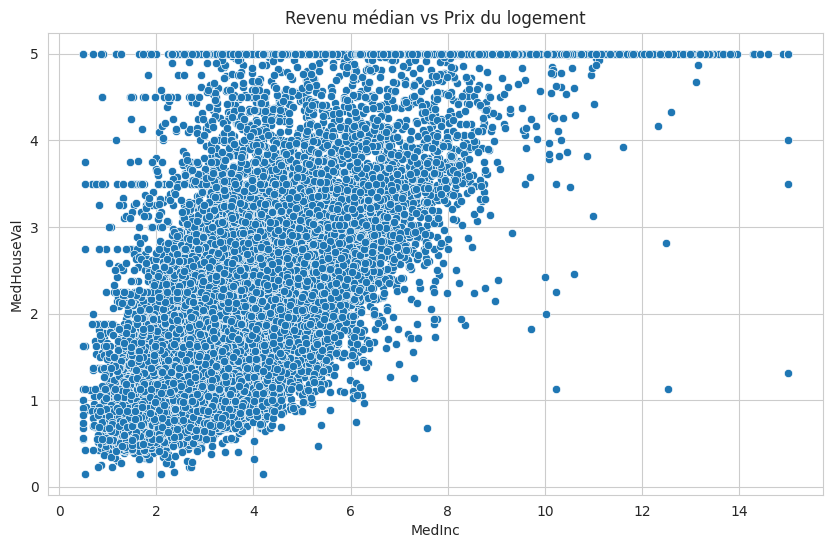

In [17]:
sns.scatterplot(x=df['MedInc'], y=df['MedHouseVal'])
plt.title("Revenu médian vs Prix du logement")
plt.show()

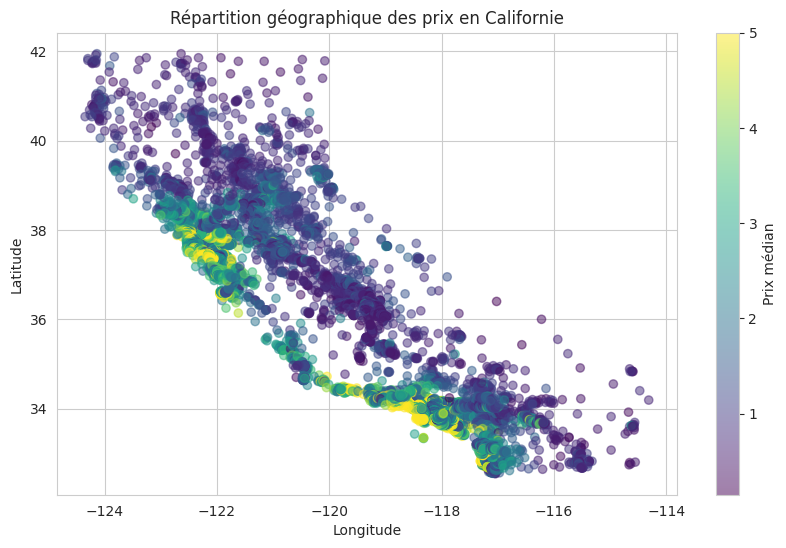

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(df['Longitude'], df['Latitude'],
            c=df['MedHouseVal'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Prix médian')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Répartition géographique des prix en Californie")
plt.show()

In [19]:
# 4. Ingénierie des variables
df['PiecesParChambre'] = df['AveRooms'] / df['AveBedrms']
df['PopParLogement'] = df['Population'] / df['AveOccup']

In [20]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

In [21]:
# 5. Séparation entraînement / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Taille X_train :", X_train.shape)
print("Taille X_test :", X_test.shape)

Taille X_train : (16496, 10)
Taille X_test : (4124, 10)


In [22]:
# 6. Construction du modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
print("Intercept (β₀) :", model.intercept_)

Intercept (β₀) : -33.53006591758951


In [24]:
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coefficients

,Variable,Coefficient
0,MedInc,0.440050
2,AveRooms,0.089642
1,HouseAge,0.010921
9,PopParLogement,0.000643
4,Population,-0.000183
5,AveOccup,-0.175447
3,AveBedrms,-0.213081
8,PiecesParChambre,-0.227512
7,Longitude,-0.416648
6,Latitude,-0.418171


In [25]:
# 7. Prédiction et évaluation
y_pred = model.predict(X_test)

In [26]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAE  : {mae:.4f}")
print(f"R²   : {r2:.4f}")

MSE  : 0.4560
RMSE : 0.6753
MAE  : 0.4904
R²   : 0.6483


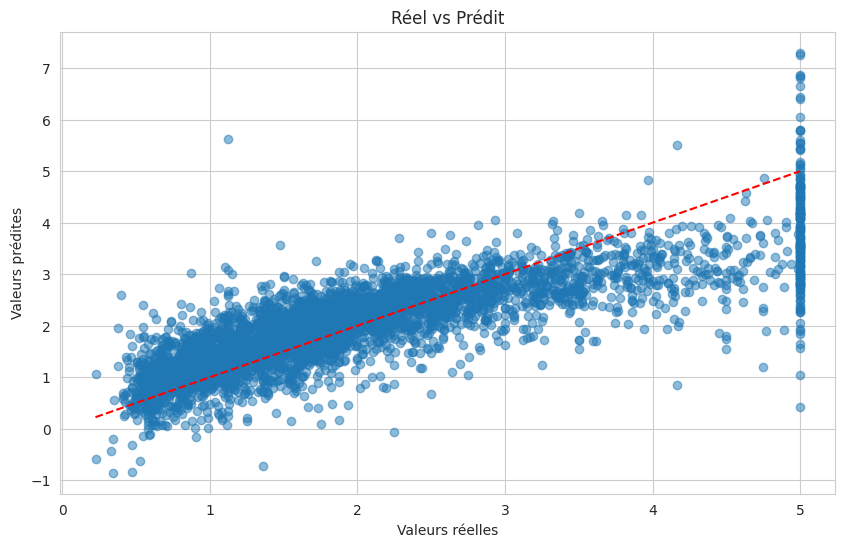

In [27]:
# 8. Visualisation des résultats
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Réel vs Prédit")
plt.show()

In [28]:
residus = y_test - y_pred

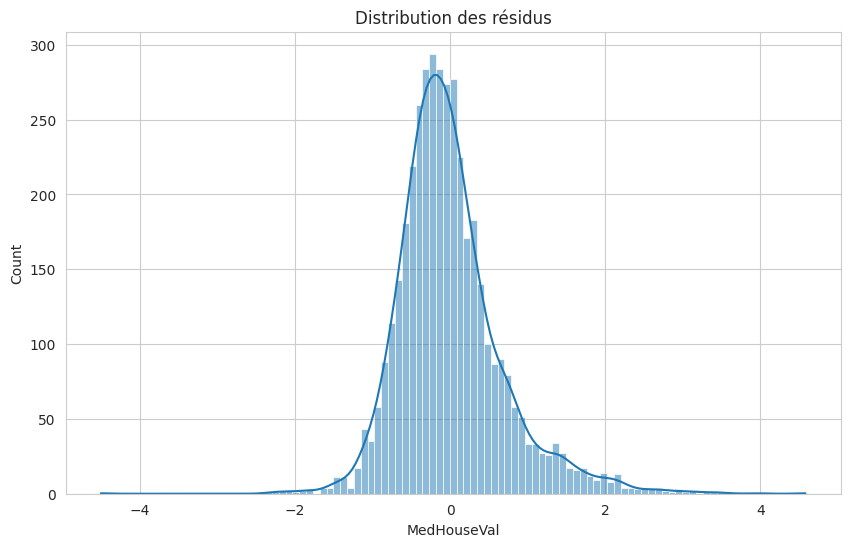

In [29]:
sns.histplot(residus, kde=True)
plt.title("Distribution des résidus")
plt.show()

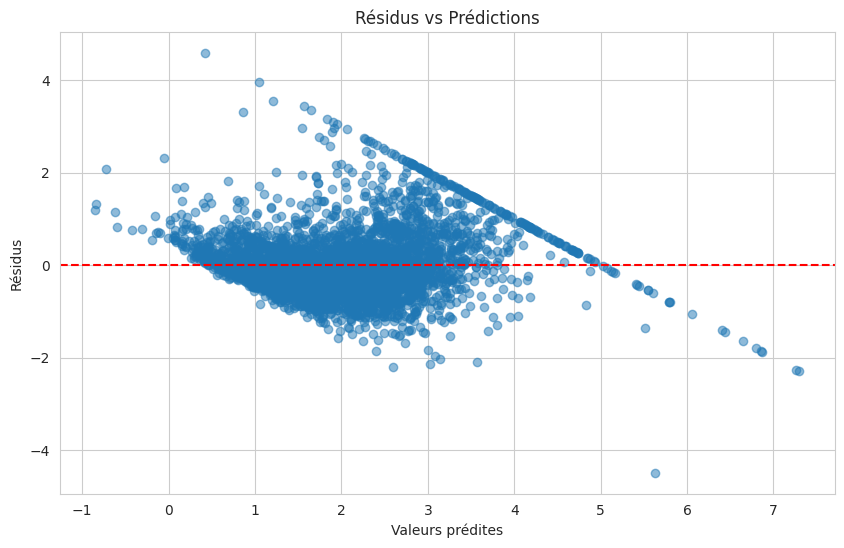

In [30]:
plt.scatter(y_pred, residus, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.title("Résidus vs Prédictions")
plt.show()

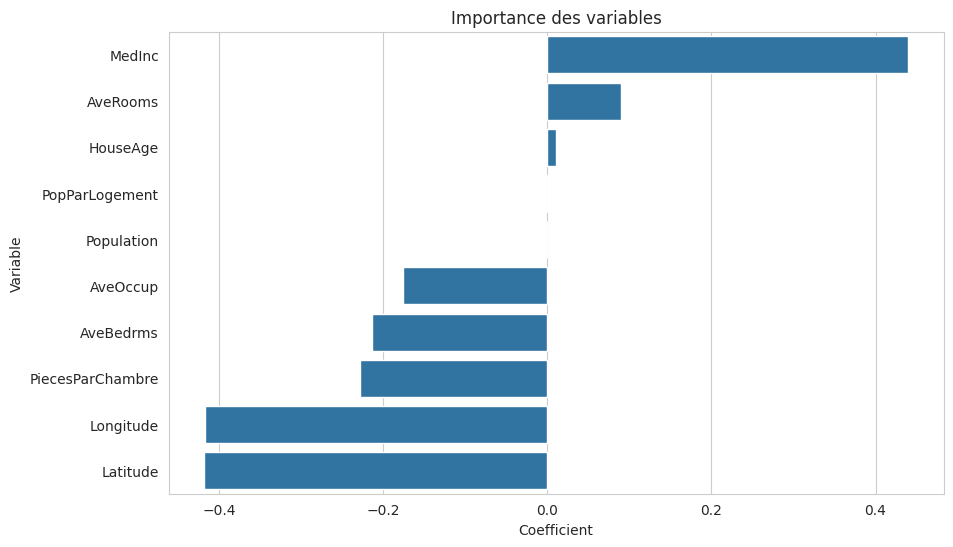

In [31]:
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Variable', data=coefficients)
plt.title("Importance des variables")
plt.show()

In [32]:
# 9.Export des résultats
resultats = X_test.copy()
resultats['Prix_reel'] = y_test
resultats['Prix_predit'] = y_pred
resultats['Residus'] = resultats['Prix_reel'] - resultats['Prix_predit']
resultats['Erreur_%'] = (resultats['Residus'] / resultats['Prix_reel']) * 100

In [33]:
resultats.to_csv("resultats_regression.csv", index=False)
print("Fichier exporté avec succès ✅")

Fichier exporté avec succès ✅
